In [72]:
'''
mysql -h database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com -P 3306 -u EDA_project -p
'''

import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)


## 평균자책점 (ERA)
투수가 규정 이닝 중 자신의 실책으로 내준 점수를 평균한 수치
(안타, 희생 플라이, 희생타, 사사구, 폭투, 야수 선택, 도루)

In [73]:
import pandas as pd

sql = ('''select t.year,r.순위, t.팀명, t.평균자책점
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =24 and  t.year=24''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
era_df_24 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '평균자책점'])


sql = ('''select t.year,r.순위, t.팀명, t.평균자책점
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =23 and  t.year=23''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
era_df_23 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '평균자책점'])


sql = ('''select t.year,r.순위, t.팀명, t.평균자책점
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =22 and  t.year=22''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
era_df_22 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '평균자책점'])

remote.close()

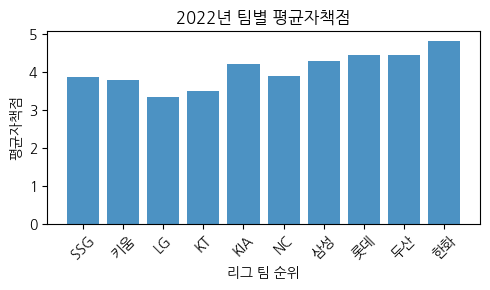

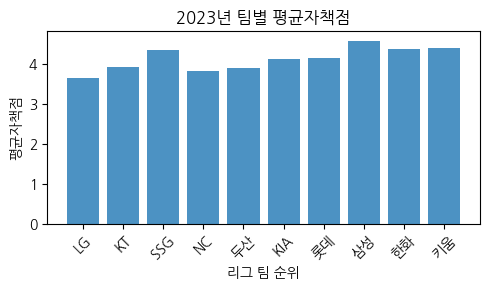

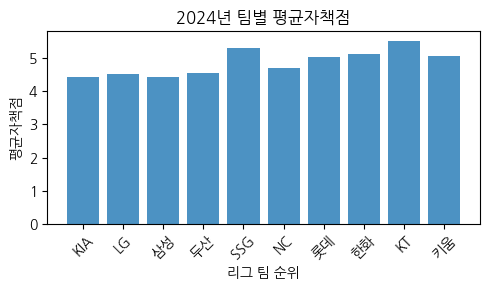

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 각 연도별 바 그래프 그리기
def plot_bar_chart(df, year):
    plt.figure(figsize=(5, 3))
    plt.bar(df['팀명'], df['평균자책점'], alpha=0.8)
    
    plt.xlabel('리그 팀 순위')
    plt.ylabel('평균자책점')
    plt.title(f'{year}년 팀별 평균자책점')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2022년 그래프
plot_bar_chart(era_df_22, 2022)

# 2023년 그래프
plot_bar_chart(era_df_23, 2023)

# 2024년 그래프
plot_bar_chart(era_df_24, 2024)

### 상위권 팀일수록 평균 자책점이 낮습니다.
평균 자책점이 높을수록 하위권으로 갈 확률이 높습니다. (SSG는 평균 자책점이 비교적 높은데, 리그 상위권 유지)
#### (22년 리그 1위, 평균자책점 4위) (23년 리그 3위, 평균자책점 7위) (24년 리그 5위, 평균자책점 9위)

In [75]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)

In [76]:
import pandas as pd

sql = ('''select t.year,r.순위, t.팀명, t.이닝당출루허용률
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =24 and  t.year=24''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
whip_df_24 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '이닝당출루허용률'])


sql = ('''select t.year,r.순위, t.팀명, t.이닝당출루허용률
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =23 and  t.year=23''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
whip_df_23 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '이닝당출루허용률'])


sql = ('''select t.year,r.순위, t.팀명, t.이닝당출루허용률
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =22 and  t.year=22''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
whip_df_22 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '이닝당출루허용률'])

remote.close()

## 이닝당출루허용률 (WHIP)
피안타 수, 볼넷 수, 고의사구의 합을 투구 이닝으로 나눈 수치 [(피안타 + 볼넷) / 이닝수]

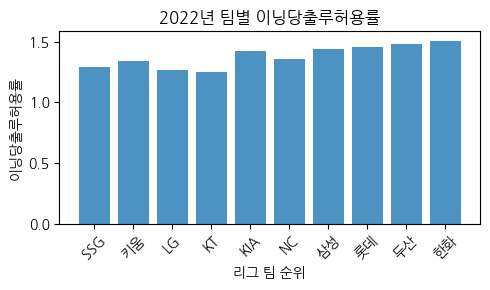

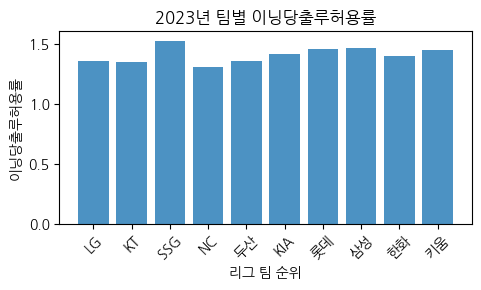

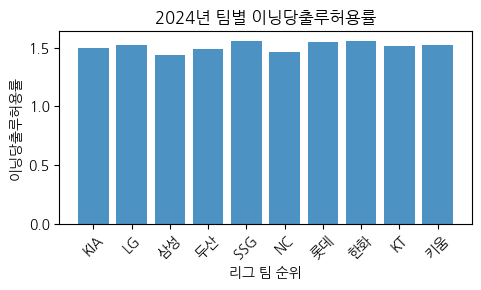

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 각 연도별 바 그래프 그리기
def plot_bar_chart(df, year):
    plt.figure(figsize=(5, 3))
    plt.bar(df['팀명'], df['이닝당출루허용률'], alpha=0.8)
    plt.xlabel('리그 팀 순위')
    plt.ylabel('이닝당출루허용률')
    plt.title(f'{year}년 팀별 이닝당출루허용률')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2022년 그래프
plot_bar_chart(whip_df_22, 2022)

# 2023년 그래프
plot_bar_chart(whip_df_23, 2023)

# 2024년 그래프
plot_bar_chart(whip_df_24, 2024)

In [78]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)

## 피안타율 (AVG)
투수가 상대한 타수에 대해 맞은 안타의 비율

In [79]:
import pandas as pd

sql = ('''select t.year,r.순위, t.팀명, t.피안타율
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =24 and  t.year=24''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
avg_df_24 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '피안타율'])

sql = ('''select t.year,r.순위, t.팀명, t.피안타율
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =23 and  t.year=23''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
avg_df_23 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '피안타율'])

sql = ('''select t.year,r.순위, t.팀명, t.피안타율
       from 팀기록_투수 t, 연도별_팀순위 r
       where t.팀명=r.팀명 and r.year =22 and  t.year=22''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
df = pd.DataFrame(result)
avg_df_22 = pd.DataFrame(result, columns=['연도', '팀순위', '팀명', '피안타율'])

remote.close()

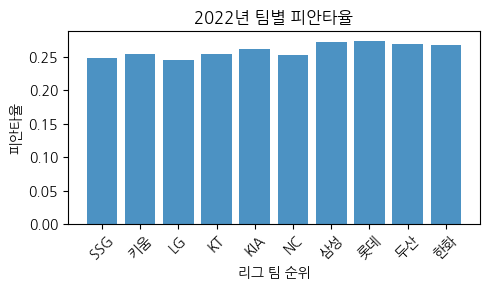

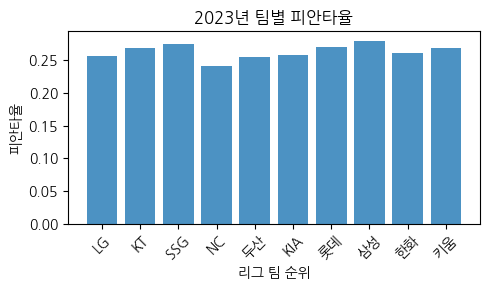

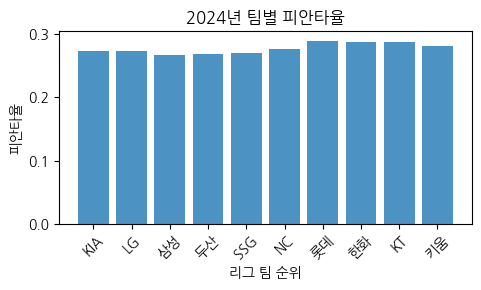

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

# 각 연도별 바 그래프 그리기
def plot_bar_chart(df, year):
    plt.figure(figsize=(5, 3))
    plt.bar(df['팀명'], df['피안타율'], alpha=0.8)
    plt.xlabel('리그 팀 순위')
    plt.ylabel('피안타율')
    plt.title(f'{year}년 팀별 피안타율')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2022년 그래프
plot_bar_chart(avg_df_22, 2022)

# 2023년 그래프
plot_bar_chart(avg_df_23, 2023)

# 2024년 그래프
plot_bar_chart(avg_df_24, 2024)

In [ ]:
era_df_22

## 수비율 종합 그래프

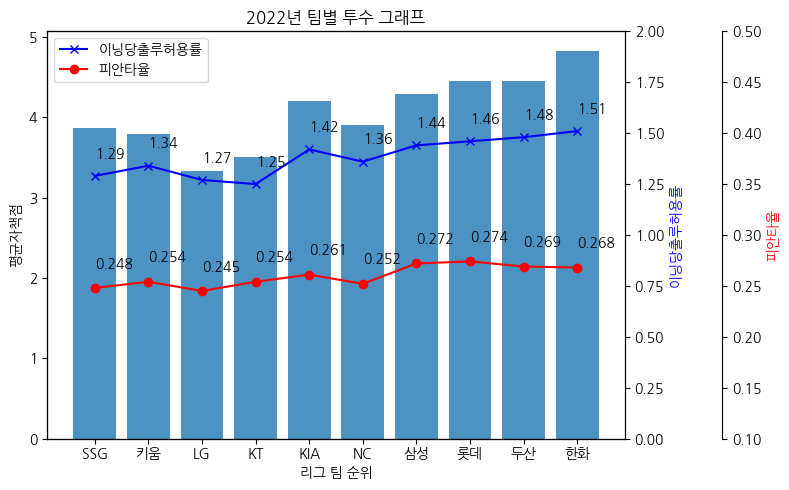

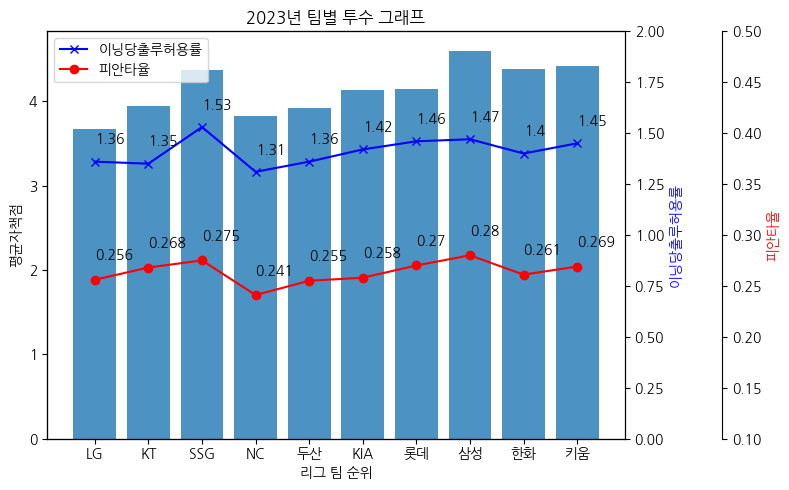

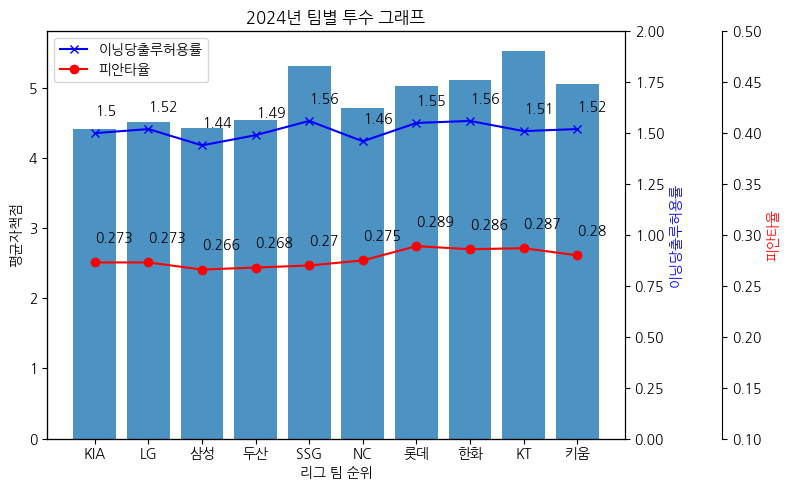

In [81]:
import matplotlib.pyplot as plt

def plot_bar_chart(era_df, avg_df, whip_df, year):
    fig, ax1 = plt.subplots(figsize=(8,5))
    
    # 바 차트 추가 (예시로 주석 처리)
    ax1.bar(era_df['팀명'], era_df['평균자책점'], alpha=0.8)
    plt.xlabel('리그 팀 순위')
    plt.ylabel('평균자책점')

    ax2 = ax1.twinx() #2번축 생성
    ax2.set_ylim(0, 2.0)  # 두 번째 축의 y축 범위 설정
    plt.ylabel('이닝당출루허용률',color = 'b')
    # 스캐터 플롯 추가
    ax2.plot(whip_df['팀명'], whip_df['이닝당출루허용률'], color='b', linestyle='-',label='이닝당출루허용률', marker='x')

    ax3 = ax1.twinx() #3번축 생성
    ax3.spines['right'].set_position(('outward', 70))
    ax3.set_ylim(0.1, 0.5)  # 두 번째 축의 y축 범위 설정
    plt.ylabel('피안타율',color = 'r')
    # 스캐터 플롯 추가
    ax3.plot(avg_df['팀명'], avg_df['피안타율'], color='r', linestyle='-', label='피안타율',marker='o')

    plt.title(f'{year}년 팀별 투수 그래프')
    plt.xticks(rotation=50)
    
   # 범례 합치기
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(lines2 + lines3, labels2 + labels3, loc='upper left')

    plt.tight_layout()

    for idx in range(10):
        row = avg_df.iloc[idx]
        label = row['피안타율']
        x = row['팀명']
        y = row['피안타율']

        ax3.text(x, y+0.02, label)

        row = whip_df.iloc[idx]
        label = row['이닝당출루허용률']
        x = row['팀명']
        y = row['이닝당출루허용률']

        ax2.text(x, y+0.09, label)
    plt.show()

# 2022년 그래프
plot_bar_chart(era_df_22 , avg_df_22, whip_df_22, 2022)

# 2023년 그래프
plot_bar_chart(era_df_23, avg_df_23, whip_df_23,2023)

# 2024년 그래프
plot_bar_chart(era_df_24, avg_df_24, whip_df_24,2024)

## 야구공 바뀜 경기당 장타 개수 (장타 = (2루타 + 3루타 + 홈런) / 경기수)
24 vs 22, 23

In [82]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)

In [83]:
import pandas as pd

sql = ('''select b.year, y.순위,b.팀_이름, b.2루타, b.3루타, b.홈런, b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=22 and b.year = 22
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_df_22 = pd.DataFrame(result, columns=['연도', '팀순위', '팀이름', '2루타', '3루타', '홈런', '경기수'])


sql = ('''select b.year, y.순위,b.팀_이름, b.2루타, b.3루타, b.홈런, b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=23 and b.year = 23
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_df_23 = pd.DataFrame(result, columns=['연도', '팀순위', '팀이름', '2루타', '3루타', '홈런', '경기수'])


sql = ('''select b.year, y.순위,b.팀_이름, b.2루타, b.3루타, b.홈런, b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=24 and b.year = 24
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_df_24 = pd.DataFrame(result, columns=['연도', '팀순위', '팀이름', '2루타', '3루타', '홈런', '경기수'])

# remote.close()

In [ ]:
hit_df_22

In [84]:
def longhit_count(df):
    hit_temp = []
    homerun_temp = []
    for team_idx in range(10):
        row = df.iloc[team_idx]
        double_hit = row['2루타']
        triple_hit = row['3루타']
        home_run = row['홈런']
        game = row['경기수']
        hit_temp.append((double_hit+triple_hit+home_run)/game)
        homerun_temp.append(round(home_run/game,2))
    
    df['경기당 장타수'] = hit_temp
    df['경기당 홈런수'] = homerun_temp
    
longhit_count(hit_df_22)
longhit_count(hit_df_23)
longhit_count(hit_df_24)

In [88]:
combined_df = pd.concat([hit_df_22, hit_df_23, hit_df_24])
combined_df

,연도,팀순위,팀이름,2루타,3루타,홈런,경기수,경기당 장타수,경기당 홈런수
0,22,1,SSG,242,18,138,144,2.763889,0.96
1,22,2,키움,203,33,94,144,2.291667,0.65
2,22,3,LG,208,33,118,144,2.493056,0.82
3,22,4,KT,192,19,119,144,2.291667,0.83
4,22,5,KIA,250,19,113,144,2.652778,0.78
5,22,6,NC,230,15,105,144,2.430556,0.73
6,22,7,삼성,241,19,103,144,2.520833,0.72
7,22,8,롯데,227,16,106,144,2.423611,0.74
8,22,9,두산,210,12,101,144,2.243056,0.70
9,22,10,한화,217,19,88,144,2.250000,0.61


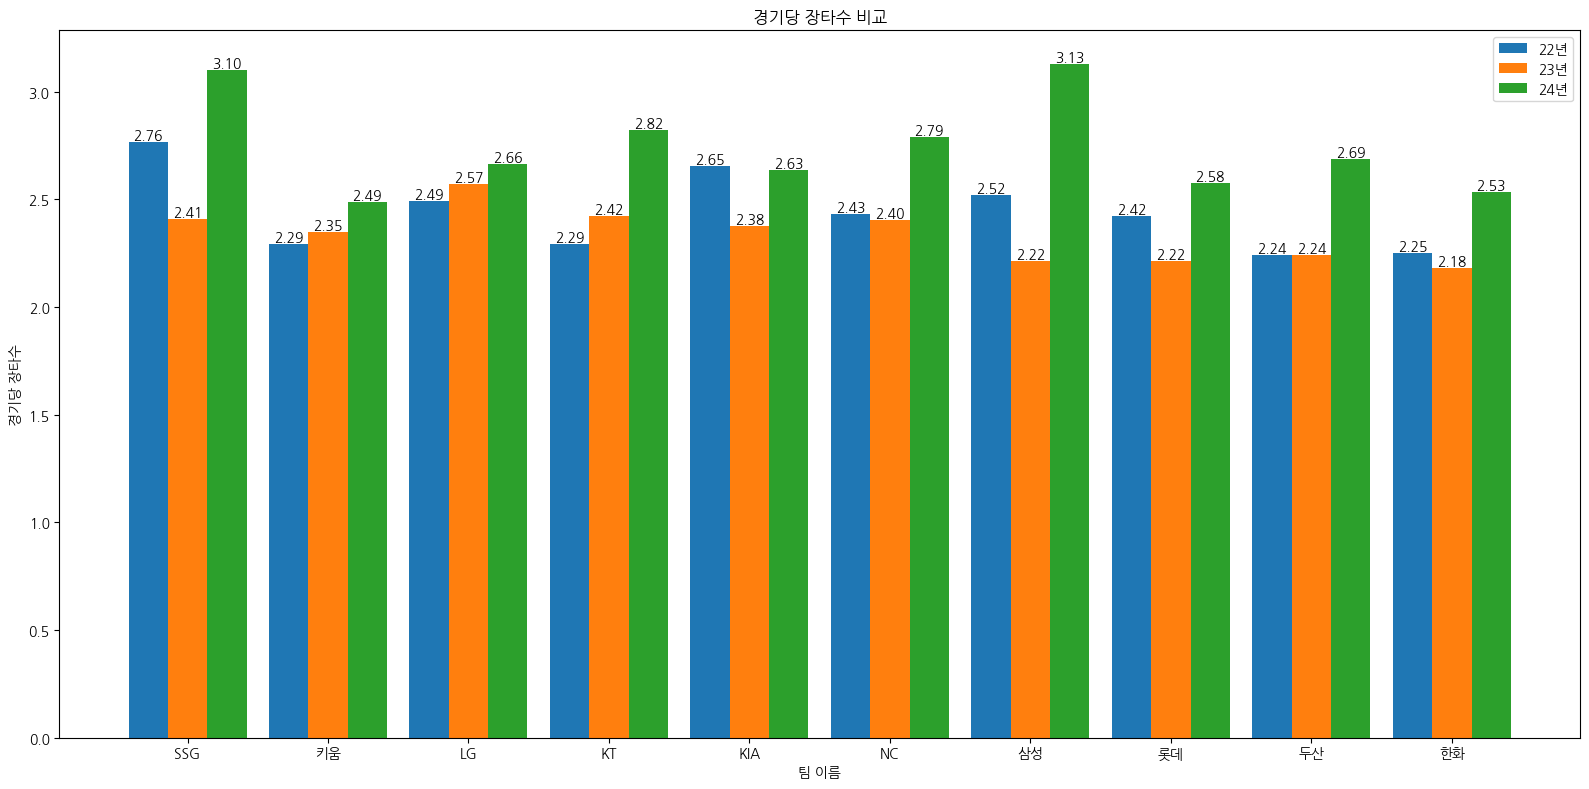

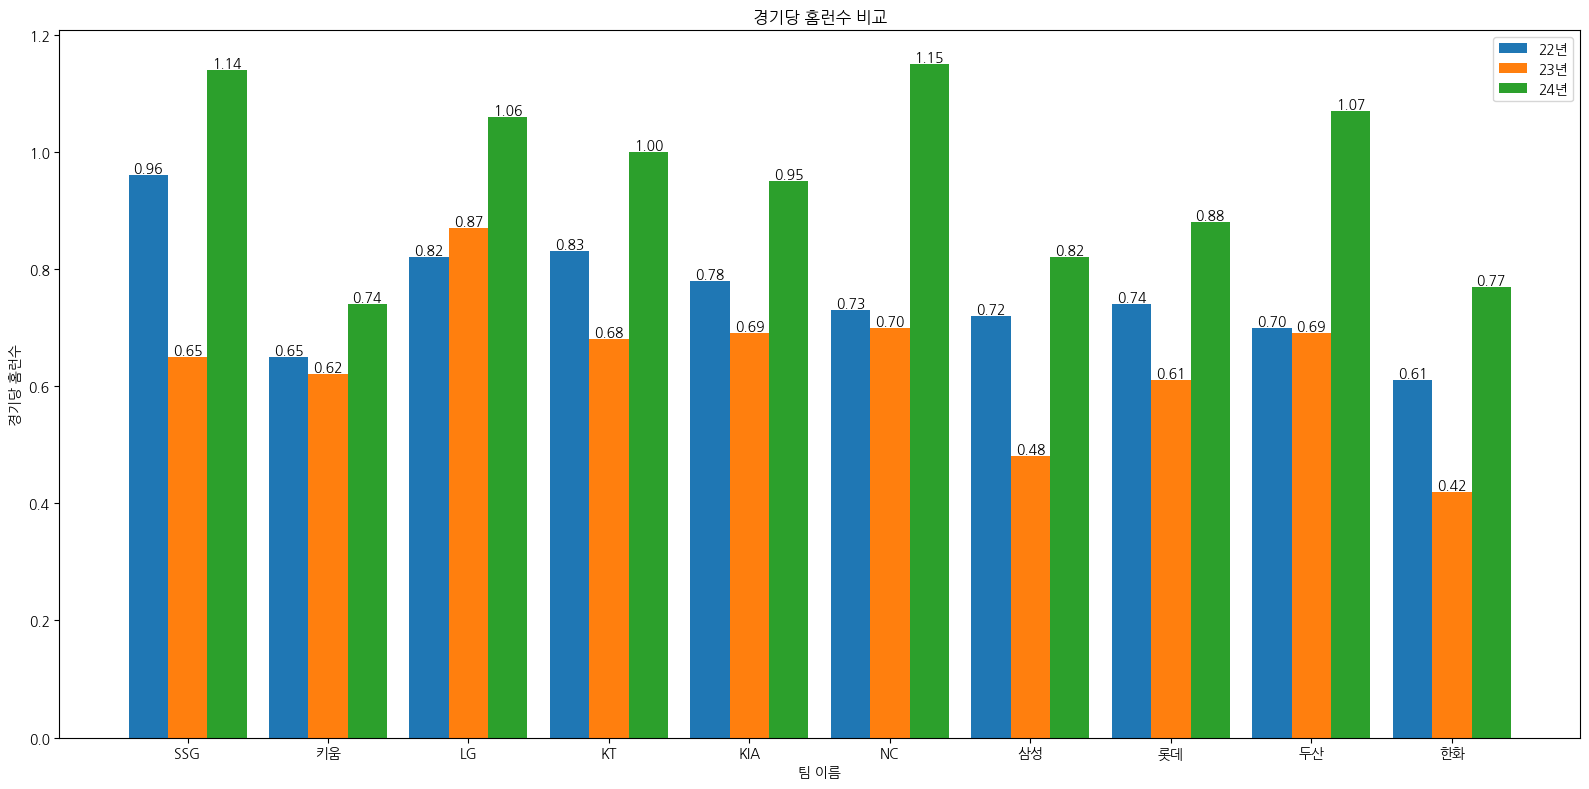

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

def plot_combined_bar_chart(df, column, title):
    fig, ax = plt.subplots(figsize=(16, 8))  # 그래프 전체적인 크기 조정
    teams = df['팀이름'].unique()
    years = df['연도'].unique()
    bar_width = 0.28
    index = np.arange(len(teams))

    for i, year in enumerate(years):
        year_data = df[df['연도'] == year]
        bars = ax.bar(index + bar_width * (i - 1), year_data[column], bar_width, label=f'{year}년')  # 각 연도별 바의 위치 조정
        # 각 바 위에 데이터 값 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    ax.set_xlabel('팀 이름')
    ax.set_ylabel(column)
    ax.set_title(f'{title} 비교')
    ax.set_xticks(index)
    ax.set_xticklabels(teams)
    ax.legend(loc='upper right')  # 범례 위치 조정
    plt.xticks(rotation=0)
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()

# 경기당 장타수 그래프
plot_combined_bar_chart(combined_df, '경기당 장타수', '경기당 장타수')

# 경기당 홈런수 그래프
plot_combined_bar_chart(combined_df, '경기당 홈런수', '경기당 홈런수')

## 시즌별 비교

In [ ]:
import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)

In [ ]:
import pandas as pd

sql = ('''select b.year, sum(b.2루타), sum(b.3루타), sum(b.홈런), b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=22 and b.year = 22
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_sum_df_22 = pd.DataFrame(result, columns=['연도', '2루타', '3루타', '홈런', '경기수'])


sql = ('''select b.year, sum(b.2루타), sum(b.3루타), sum(b.홈런), b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=22 and b.year = 23
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_sum_df_23 = pd.DataFrame(result, columns=['연도', '2루타', '3루타', '홈런', '경기수'])


sql = ('''select b.year, sum(b.2루타), sum(b.3루타), sum(b.홈런), b.경기_수
       from 팀기록_타자 b, 연도별_팀순위 y
       where b.팀_이름 = y.팀명 and y.year=22 and b.year = 24
       order by y.year asc, y.순위 asc''')
kbo_base.execute(sql)
result = kbo_base.fetchall()
hit_sum_df_24 = pd.DataFrame(result, columns=['연도', '2루타', '3루타', '홈런', '경기수'])

# remote.close()

In [ ]:
hit_sum_df_22

In [ ]:
import pandas as pd
hit_sum_df = pd.concat([hit_sum_df_22, hit_sum_df_23, hit_sum_df_24],axis=0)
hit_sum_df.reset_index(drop=True,inplace=True)
hit_sum_df

In [ ]:
def longhit_season(df):
    hit_temp = []
    homerun_temp=[]
    for team_idx in range(len(df)):
        row = df.iloc[team_idx]
        double_hit = row['2루타']
        triple_hit = row['3루타']
        home_run = row['홈런']
        game = row['경기수']
        hit_temp.append(float(round((double_hit+triple_hit+home_run)/game,2)))
        homerun_temp.append(float(round(home_run/game,2)))
    df['경기당 장타수'] = hit_temp
    df['경기당 홈런수'] = homerun_temp
    
longhit_season(hit_sum_df)

hit_sum_df


In [ ]:
hit_sum_df.drop(columns={'2루타','3루타','홈런','연도'},inplace=True)
hit_sum_df

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터프레임 생성
data = {
    '카테고리': ['경기수', '경기당 장타수', '경기당 홈런수'],
    '값': [144, 24.36, 7.53],  # 첫 번째 연도에 해당하는 값들
    '값2': [144, 23.38, 6.42],  # 두 번째 연도에 해당하는 값들
    '값3': [82, 27.27, 9.54]  # 세 번째 연도에 해당하는 값들
}

df = pd.DataFrame(data)

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))

# 막대의 폭 설정
width = 0.25

# 데이터 카테고리 설정
categories = df['카테고리']
x = range(len(categories))

# 막대 그리기
bar1 = ax.bar(x, df['값'], width=width, label='22년')
bar2 = ax.bar([p + width for p in x], df['값2'], width=width, label='23년')
bar3 = ax.bar([p + width*2 for p in x], df['값3'], width=width, label='24년')

# 각 막대에 값 표시
for rect in bar1:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.2, f'{height}', ha='center', va='bottom')

for rect in bar2:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.2, f'{height}', ha='center', va='bottom')

for rect in bar3:
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 0.2, f'{height}', ha='center', va='bottom')

# 레이블 및 제목 설정
ax.set_xlabel('데이터 카테고리')
ax.set_ylabel('값')
ax.set_title('연도별 경기수, 경기당 장타수, 경기당 홈런수')
ax.set_xticks([p + width for p in x])
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### KBO에서 관객의 재미를 위해서, 장타를 많이 칠 수 있도록 야구공을 변경하였습니다.
24년 경기수는 절반밖에 되지않았지만, 야구공이 변경되면서 지난 해들에 비해 경기당 장타수와 홈런수가 소폭 증가하였습니다.

In [170]:
'''
mysql -h database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com -P 3306 -u EDA_project -p
'''

import mysql.connector

remote = mysql.connector.connect(
    host = "database-1.cnusogkkql3j.us-east-2.rds.amazonaws.com ",
    port = 3306,
    user = "EDA_project",
    password = "1234",

    database = "KBO"
)
kbo_base = remote.cursor(buffered=True)


In [205]:
import pandas as pd

#24년
sql = ('''select sum(c.crowd) as '관중수' from crowd c
       where date like '2024%' ''')

kbo_base.execute(sql)

result = kbo_base.fetchall()
crownd_df_24 = pd.DataFrame(result,columns=['관중수'])

#23년
sql = ('''select sum(c.crowd) as '관중수' from crowd c
       where date like '2023%' ''')

kbo_base.execute(sql)

result = kbo_base.fetchall()
crownd_df_23 = pd.DataFrame(result,columns=['관중수'])

#22년
sql = ('''select sum(c.crowd) as '관중수' from crowd c
       where date like '2022%' ''')

kbo_base.execute(sql)

result = kbo_base.fetchall()
crownd_df_22 = pd.DataFrame(result,columns=['관중수'])
crownd_df_22

,관중수
0,3063185


In [238]:
year = ['22년','23년','24년']
crownd_df = pd.concat([crownd_df_22,crownd_df_23,crownd_df_24],axis=0)

crownd_df['year'] = year
# crownd_df['관중수']=(crownd_df['관중수']/1000).astype(int)
crownd_df

,관중수,year
0,3063185,22년
0,3918959,23년
0,5899186,24년


/tmp/ipykernel_2871/3739964627.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='관중수', data=crownd_df, ax=ax, palette=colors)


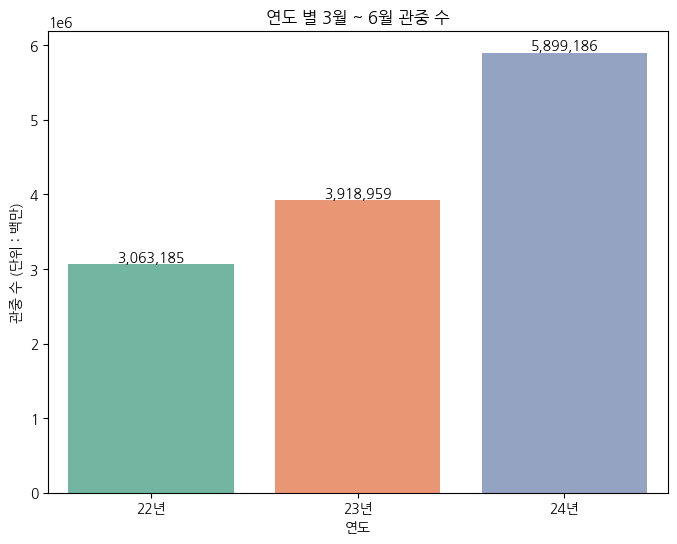

In [243]:
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#66C2A5', '#FC8D62', '#8DA0CB'] 
fig, ax = plt.subplots(figsize=(8,6))
sns.barplot(x='year', y='관중수', data=crownd_df, ax=ax, palette=colors)
plt.xlabel('연도')
plt.ylabel('관중 수 (단위 : 백만)')
plt.title('연도 별 3월 ~ 6월 관중 수')


for crownd_df_idx in range(len(crownd_df)):
    row = crownd_df.iloc[crownd_df_idx]
    x = row['year']
    y = row['관중수']
    label = row['관중수']
    ax.text(x, y, format(label,','), ha = 'center', va = 'bottom')


In [49]:
def plot_combined_bar_chart(df, column, title):
    fig, ax = plt.subplots(figsize=(16, 8))  # 그래프 전체적인 크기 조정
    teams = df['팀이름'].unique()
    years = df['연도'].unique()
    bar_width = 0.28
    index = np.arange(len(teams))

    for i, year in enumerate(years):
        year_data = df[df['연도'] == year]
        bars = ax.bar(index + bar_width * (i - 1), year_data[column], bar_width, label=f'{year}년')  # 각 연도별 바의 위치 조정
        # 각 바 위에 데이터 값 표시
        for bar in bars:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

    ax.set_xlabel('팀 이름')
    ax.set_ylabel(column)
    ax.set_title(f'{title} 비교')
    ax.set_xticks(index)
    ax.set_xticklabels(teams)
    ax.legend(loc='upper right')  # 범례 위치 조정
    plt.xticks(rotation=0)
    plt.tight_layout()  # 그래프 간격 조정
    plt.show()

[(Decimal('3063185'),)]
